In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("/StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [26]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000.0,NaN,NaN,NaN,66.001,15.569567,0.0,57.0,66.0,77.0,100.0
reading score,1000.0,NaN,NaN,NaN,69.195,14.706436,17.0,59.0,70.0,79.25,100.0
writing score,1000.0,NaN,NaN,NaN,68.119,15.226381,10.0,58.0,69.0,79.0,100.0


In [18]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

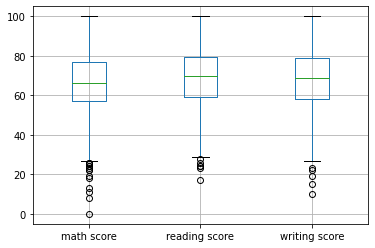

In [27]:
data.boxplot()

**1. Find out how many males and females participated in the test**

In [23]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [16]:
f_count=data['gender'].value_counts()['female']
m_count=data['gender'].value_counts()['male']
print("count of females and males participated in the test is female_count : %d , male_count : %d"  %(f_count,m_count))

count of females and males participated in the test is female_count : 518 , male_count : 482


**2. What do you think about the students' parental level of education?**

In [22]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [31]:
data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.977477,71.018018,70.031532
bachelor's degree,69.288136,73.000000,73.381356
high school,61.821429,64.602041,62.403061
master's degree,70.254237,75.949153,75.677966
some college,67.128319,69.566372,69.035398
some high school,63.134078,66.759777,64.888268


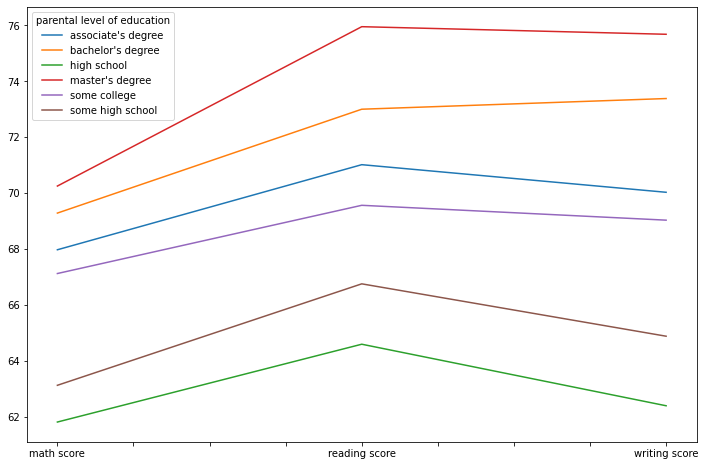

In [32]:
data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(12,8))

from the above graph its clear that students whose parents are more educated are performing better than students whose parents are less educated.

**3. Who scores the most on average for math, reading and writing based on** 

a.   Gender

b.   Test preparation course 

In [34]:
data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


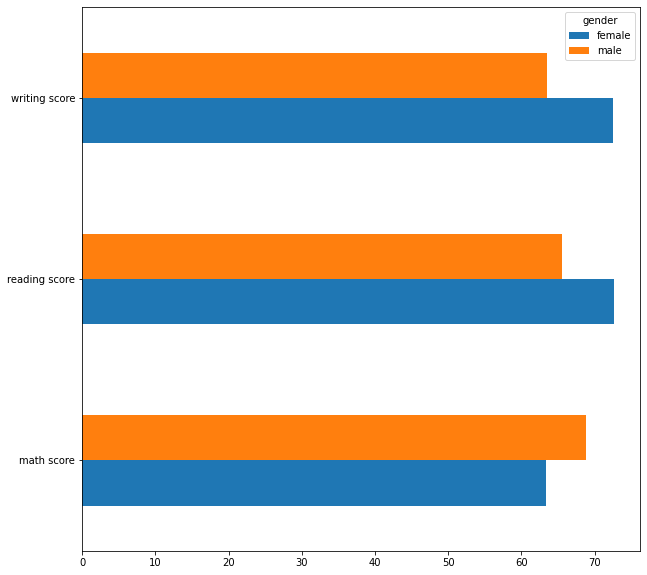

In [38]:
data.groupby('gender')[['math score', 'reading score', 'writing score']].mean().T.plot(kind='barh', figsize=(10,10))

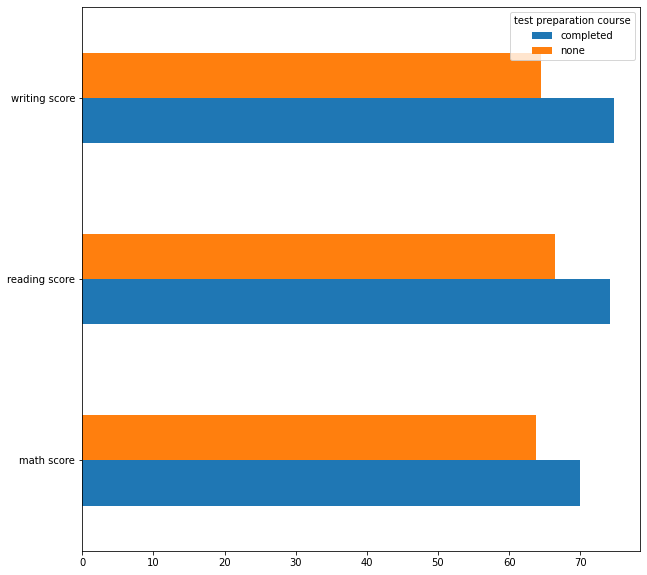

In [37]:
data.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T.plot(kind='barh', figsize=(10,10))

it is very clear that students who have completed the test preparation course have performed better, on average, as compared to students who have not opted for the course.

In [42]:
df1 = data.groupby(['gender','parental level of education'])[['reading score', 'math score', 'writing score']].mean()
df1

reading score  math score  writing score
gender parental level of education                                          
female associate's degree               74.120690   65.250000      74.000000
       bachelor's degree                77.285714   68.158730      78.380952
       high school                      68.202128   58.840426      66.691489
       master's degree                  76.805556   66.500000      77.638889
       some college                     73.550847   65.186441      74.050847
       some high school                 69.010989   58.780220      68.285714
male   associate's degree               67.622642   70.962264      65.688679
       bachelor's degree                68.090909   70.581818      67.654545
       high school                      61.284314   64.568627      58.450980
       master's degree                  74.608696   76.130435      72.608696
       some college                     65.212963   69.250000      63.555556
       some high school                 64.431818   67.636364      61.375000

**4. What do you think about the scoring variation for math, reading and writing based on** 

a.   Gender

b.   Test preparation course 


In [43]:
df1 = data.groupby(['gender','parental level of education'])[['reading score', 'math score', 'writing score']].std()
df1

reading score  math score  writing score
gender parental level of education                                          
female associate's degree               13.200893   14.879151      13.307076
       bachelor's degree                14.251688   16.017336      13.750576
       high school                      14.082384   16.022366      14.378917
       master's degree                  14.830123   15.579290      14.558557
       some college                     12.392166   14.307938      13.343488
       some high school                 16.747467   17.862936      16.965511
male   associate's degree               13.791269   14.857369      14.059305
       bachelor's degree                12.766090   14.158744      13.796428
       high school                      13.638456   13.837465      12.811371
       master's degree                   9.787465   11.643587      11.987642
       some college                     15.040786   15.248793      15.035990
       some high school                 14.285106   13.912850      13.576782


** 5.The management needs your help to give bonus points to the top 25% of  students based on their math score, so how will you help the management
to achieve this.** 

In [47]:
data['math score'].max()

100

In [51]:
data['math score'].nlargest(5)

515    100
516    100
517    100
996    100
997    100
Name: math score, dtype: int64